# Analysis Pipeline 

#### Load Modules and setup environment

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# run plots in the notebook
%matplotlib inline

#### Read in data from a URL

In [8]:
url = "http://pbpython.com/extras/sample-salesv2.csv"

sales = pd.read_csv(url)

#### Rename pesky columns with spaces

In [89]:
sales.columns = ['acct_num', 'name', 'sku', 'category', 'quantity', 'unit_price', 'ext_price', 'date']

#### View the first few lines (head) of the sales dataframe

In [90]:
sales.head()

,acct_num,name,sku,category,quantity,unit_price,ext_price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


#### Get a quick summary of the data

In [91]:
sales.describe()

,acct_num,quantity,unit_price,ext_price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


We can actually learn some pretty helpful info from this simple command:

- We can tell that customers on average purchases 10.3 items per transaction
- The average cost of the transaction was $579.84
- It is also easy to see the min and max so you understand the range of the data

If we want we can look at a single column as well:

In [93]:
sales['unit_price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit_price, dtype: float64

#### Check on the data types for each column
This helps you make sure you can perform any calculations on the data in the column, if needed

In [94]:
sales.dtypes

acct_num        int64
name           object
sku            object
category       object
quantity        int64
unit_price    float64
ext_price     float64
date           object
dtype: object

#### What's the most popular category?  

In [95]:
sales['category'].value_counts()

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

#### Let's visualize that

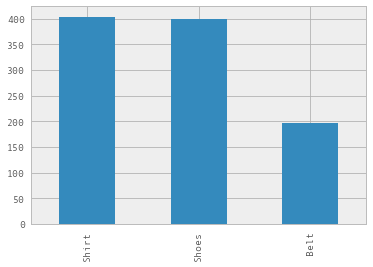

In [96]:
sales['category'].value_counts().plot(kind="bar")

## Let's find out which company sold the most belts

#### Let's subset just the info we want to work with

In [97]:
belt_df = sales[['name', 'category', 'quantity', 'unit_price']]
belt_df = belt_df[belt_df['category']== 'Belt']

In [98]:
belt_df.head()

,name,category,quantity,unit_price
0,Carroll PLC,Belt,13,44.48
11,Hegmann and Sons,Belt,6,13.12
18,"Kihn, McClure and Denesik",Belt,15,69.52
20,"Volkman, Goyette and Lemke",Belt,13,81.19
23,Berge LLC,Belt,4,57.75


In [99]:
belt_df.sort_values(by='quantity', ascending=False).head(10)

,name,category,quantity,unit_price
612,Waters-Walker,Belt,20,62.39
802,"Senger, Upton and Breitenberg",Belt,20,51.16
994,Carroll PLC,Belt,20,14.37
268,Hegmann and Sons,Belt,20,66.27
853,Berge LLC,Belt,20,25.09
538,Huel-Haag,Belt,20,58.52
584,Heidenreich-Bosco,Belt,20,38.39
505,Cole-Eichmann,Belt,19,39.75
283,Kunze Inc,Belt,19,75.70
744,Cole-Eichmann,Belt,19,99.90


#### We can see there are multiple entries per company, let's group them together

In [100]:
by_company = belt_df.groupby('name')

#### Now we can see how many entries there are for each company

In [101]:
by_company.size()

name
Berge LLC                         9
Carroll PLC                      14
Cole-Eichmann                    13
Davis, Kshlerin and Reilly        6
Ernser, Cruickshank and Lind      9
Gorczany-Hahn                    12
Hamill-Hackett                    4
Hegmann and Sons                 10
Heidenreich-Bosco                10
Huel-Haag                         9
Kerluke, Reilly and Bechtelar     8
Kihn, McClure and Denesik        12
Kilback-Gerlach                   6
Koelpin PLC                      14
Kunze Inc                         6
Kuphal, Zieme and Kub             4
Senger, Upton and Breitenberg    19
Volkman, Goyette and Lemke        8
Waelchi-Fahey                    17
Waters-Walker                     6
dtype: int64

#### Let's sum the counts for each company

In [102]:
belt_totals = by_company.sum()

In [103]:
belt_totals

,quantity,unit_price
name,,
Berge LLC,120,450.96
Carroll PLC,184,733.03
Cole-Eichmann,147,640.67
"Davis, Kshlerin and Reilly",33,309.37
"Ernser, Cruickshank and Lind",97,564.80
Gorczany-Hahn,103,580.49
Hamill-Hackett,32,198.32
Hegmann and Sons,88,589.91
Heidenreich-Bosco,106,601.04


#### And now we can graph the 10 belt sellers

In [104]:
top_sellers = belt_totals.sort_values(by='quantity', ascending=False).head(10)

In [105]:
top_sellers

,quantity,unit_price
name,,
Carroll PLC,184,733.03
"Senger, Upton and Breitenberg",171,1033.61
"Kihn, McClure and Denesik",164,724.29
Waelchi-Fahey,149,965.71
Cole-Eichmann,147,640.67
Koelpin PLC,133,551.83
Berge LLC,120,450.96
Heidenreich-Bosco,106,601.04
Gorczany-Hahn,103,580.49


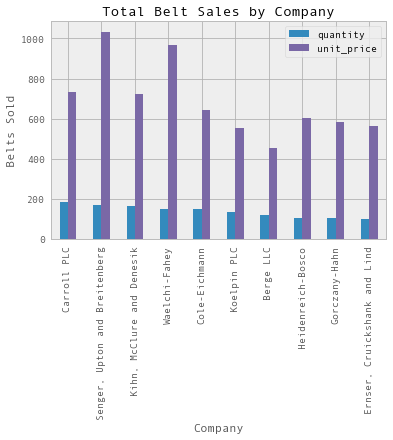

In [106]:
belt_plot = top_sellers.plot(kind="bar", title="Total Belt Sales by Company")
belt_plot.set_xlabel("Company")
belt_plot.set_ylabel("Belts Sold")

#### But wait, that's not quite right! Let's calculate how much money each company actually made selling belts

In [107]:
top_sellers

,quantity,unit_price
name,,
Carroll PLC,184,733.03
"Senger, Upton and Breitenberg",171,1033.61
"Kihn, McClure and Denesik",164,724.29
Waelchi-Fahey,149,965.71
Cole-Eichmann,147,640.67
Koelpin PLC,133,551.83
Berge LLC,120,450.96
Heidenreich-Bosco,106,601.04
Gorczany-Hahn,103,580.49


In [108]:
top_sellers['belt_sales'] = top_sellers.quantity * top_sellers.unit_price

In [109]:
top_sellers

,quantity,unit_price,belt_sales
name,,,
Carroll PLC,184,733.03,134877.52
"Senger, Upton and Breitenberg",171,1033.61,176747.31
"Kihn, McClure and Denesik",164,724.29,118783.56
Waelchi-Fahey,149,965.71,143890.79
Cole-Eichmann,147,640.67,94178.49
Koelpin PLC,133,551.83,73393.39
Berge LLC,120,450.96,54115.20
Heidenreich-Bosco,106,601.04,63710.24
Gorczany-Hahn,103,580.49,59790.47


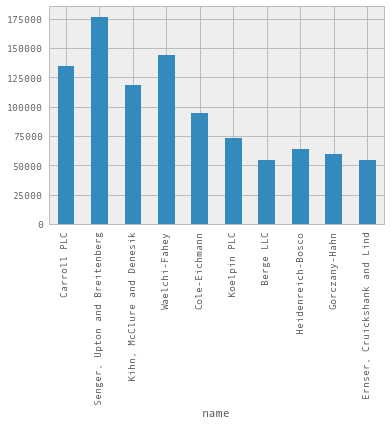

In [111]:
top_sellers['belt_sales'].plot(kind="bar")

## Saving your notebook
You must have properly installed pandoc to save your output to PDF. 
- Click on File
- Click on Download As
- Click on PDF via LaTex (pdf)
- Save your file as a PDF

As a last resort, if you are not able to get pandoc properly installed, saved your notebook as an HTML page to be viewed in a browser. 